# Projeto COVID-19

## Digital Innovation One

Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

Importando os dados

In [3]:
url = 'https://github.com/neylsoncrepalde/projeto_eda_covid/blob/master/covid_19_data.csv?raw=true'
df = pd.read_csv(url, parse_dates=['ObservationDate', 'Last Update'])
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26713 entries, 0 to 26712
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              26713 non-null  int64         
 1   ObservationDate  26713 non-null  datetime64[ns]
 2   Province/State   12882 non-null  object        
 3   Country/Region   26713 non-null  object        
 4   Last Update      26713 non-null  datetime64[ns]
 5   Confirmed        26713 non-null  float64       
 6   Deaths           26713 non-null  float64       
 7   Recovered        26713 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 1.6+ MB


Formatando os nomes das colunas para que fiquem padronizadas

In [10]:
import re

def corrige_colunas(col_name):
    #substitui / ou espaço vazio por "" e deixa minusculo
    return re.sub(r"[/| ]", "", col_name).lower()

In [12]:
df.columns = [corrige_colunas(col) for col in df.columns]
df.head()

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


# Brasil
## Trabalhar apenas com os dados do Brasil

In [15]:
df.loc[df.countryregion == 'Brazil']

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


In [19]:
brasil = df.loc[
    (df.countryregion == 'Brazil') & (df.confirmed > 0)]
    
brasil.head()

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0


## Casos confirmados

Gráfico de evolução

In [20]:
px.line(brasil, 'observationdate', 'confirmed', title='Casos confirmados no Brasil')

## Novos casos por dia

In [22]:
brasil['novoscasos'] = list(map(
    lambda x:0 if(x==0) else brasil['confirmed'].iloc[x] - brasil['confirmed'].iloc[x-1],
    np.arange(brasil.shape[0])
))
brasil.head()

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_6672\2129125542.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered,novoscasos
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,1.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,0.0


In [23]:
px.line(brasil, x='observationdate', y='novoscasos', title='Novos casos por dia')

## Mortes

In [26]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=brasil.observationdate, y=brasil.deaths, name='Mortes',
    mode='lines+markers', line={'color':'red'})
)

fig.update_layout(title='Mortes por COVID-19 no Brasil')
fig.show()

Taxa de crescimento de mortes

taxa_crescimento = (presente/passado)**(1/n)-1

In [79]:
def taxa_crescimento(data, variavel, data_inicio=None, data_fim=None):
    #Se data_inicio for None, utiliza a primeira data, se data_fim for none utiliza a ultima data
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variavel] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    if data_fim == None:
        data_fim = data.observationdate.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)

    #Define os valores de passado e presente
    passado = data.loc[data.observationdate == data_inicio, variavel].values[0]
    presente = data.loc[data.observationdate == data_fim, variavel].values[0]

    #Define o numero de pontos que vamos avaliar
    n = (data_fim - data_inicio).days

    #Calculo da taxa
    taxa = (presente/passado)**(1/n) -1

    return taxa*100

## Taxa de crescimento médio do Covid no Brasil em todo o periodo avaliado

In [80]:
taxa_crescimento(brasil, 'confirmed')

16.27183353112116

In [81]:
def taxa_crescimento_diaria(data, variavel, data_inicio=None):
    #Se data_inicio for None, utiliza a primeira data, se data_fim for none utiliza a ultima data
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variavel] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    data_fim = data.observationdate.max()
    
    #Define o numero de pontos que vamos avaliar
    n = (data_fim - data_inicio).days
    
    #Taxa calculada de um dia para o outro
    taxas = list(map(
        lambda x: (data[variavel].iloc[x] - data[variavel].iloc[x-1]) / data[variavel].iloc[x-1],
        range(1,n+1)    
    ))
    return np.array(taxas) * 100

In [82]:
taxa_dia = taxa_crescimento_diaria(brasil, 'confirmed')
taxa_dia

array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

In [85]:
primeiro_dia = brasil.observationdate.loc[brasil.confirmed > 0].min()

px.line(x=pd.date_range(primeiro_dia, brasil.observationdate.max())[1:],
       y=taxa_dia, title='Taxa de crescimento de casos confirmados no Brasil por dia')

# Predições

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [89]:
confirmados = brasil.confirmed
confirmados.index = brasil.observationdate
confirmados.head()

observationdate
2020-02-26    1.0
2020-02-27    1.0
2020-02-28    1.0
2020-02-29    2.0
2020-03-01    2.0
Name: confirmed, dtype: float64

In [90]:
res = seasonal_decompose(confirmados)
res

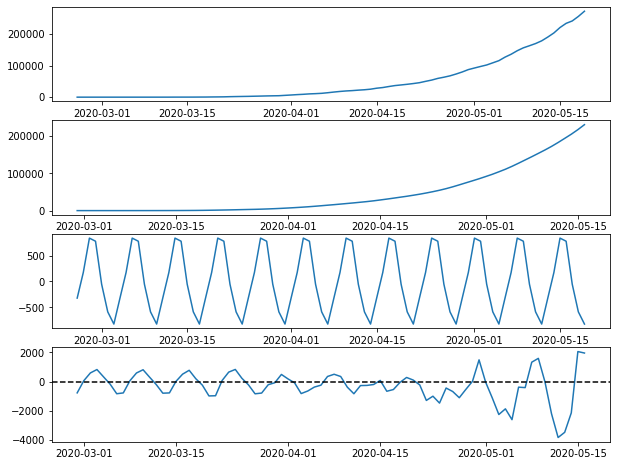

In [91]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.plot(confirmados.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

# ARIMA

Média móvel integrada auto-regressiva

In [92]:
from pmdarima.arima import auto_arima
modelo = auto_arima(confirmados)
modelo

ARIMA(order=(3, 2, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [94]:
fig = go.Figure(go.Scatter(
    x=confirmados.index, y=confirmados, name='Observados'
))

fig.add_trace(go.Scatter(
    x=confirmados.index, y=modelo.predict_in_sample(), name='Preditos'
))

fig.add_trace(go.Scatter(
    x=pd.date_range('2020-05-20', '2020-06-20'), y=modelo.predict(31), name='Forecast'
))

fig.update_layout(title='Previsão de casos confirmados no Brasil para os próximos 30 dias')
fig.show()

# Modelo de crescimento

In [95]:
from prophet import Prophet

In [96]:
# Preprocessamentos
train = confirmados.reset_index()[:-5]
test = confirmados.reset_index()[-5:]

# Renomeando colunas
train.rename(columns={'observationdate':'ds', 'confirmed': 'y'}, inplace=True)
test.rename(columns={'observationdate':'ds', 'confirmed': 'y'}, inplace=True)
test = test.set_index("ds")
test = test['y']

# Definir o modelo de crescimento
profeta = Prophet(growth='logistic', changepoints=['2020-03-21', '2020-03-30','2020-04-25',
                                                   '2020-05-03', '2020-05-10'])

pop = 211463256
train['cap'] = pop

#treina o modelo
profeta.fit(train)

# Construir previsões para o futuro
future_dates = profeta.make_future_dataframe(periods=200)
future_dates['cap'] = pop
forecast = profeta.predict(future_dates)

10:18:11 - cmdstanpy - INFO - Chain [1] start processing
10:18:12 - cmdstanpy - INFO - Chain [1] done processing


In [97]:
fig = go.Figure() 

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados - Treino'))
fig.update_layout(title='Predição de casos confirmados no Brasil')
fig.show() 